# **California Housing Price**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

This project is based on the California Housing dataset from the 1990 census. Even though the dataset is historical, it provides a great opportunity to learn and practice how to build an end-to-end machine learning model for predicting house prices. Housing price prediction remains a relevant and important topic today, especially in 2025 where real estate is still a critical factor in personal finance, investment, and policy-making, but of course, many conditions have changed. While the predictions themselves may not directly apply to today’s market, the modeling process can serve as a reflection for anyone interested in applying similar methods with updated and more reliable data.


**Problem Statement**

Predicting housing prices is always challenging because values depend on many complex factors like location, demographics, and economic conditions. In this dataset, we only have limited census-based features, so the question becomes:

*Given these features, how well can a machine learning model learn the relationship between housing and demographics to predict median house value?*

This project doesn’t aim to produce a perfect tool for 2025 housing prices, but rather to show the strengths and weaknesses of different modeling approaches and highlight what could be improved if more current data were available.

**Goals**

- To explore how different machine learning algorithms perform in predicting house prices.

- To compare the effect of preprocessing and transformation choices on model performance.

- To identify which features play the most important role in the predictions.

- To create a learning benchmark that can help others reflect on how such models might be adapted or improved for today’s market.

**Analytic Approach**

The project follows a structured machine learning pipeline:

1. **Data Preparation** → handling missing values, preparing numerical and categorical features.

2. **Feature Transformation** → scaling, encoding, and considering outlier adjustments.

3. **Model Development** → training multiple algorithms, both baseline and advanced.

4. **Model Tuning** → optimizing hyperparameters to improve performance.

5. **Model Interpretation** → using feature importance and explainable AI techniques to understand predictions.

**Metric Evaluation**

To fairly assess the models, multiple evaluation metrics are used:

1. **RMSE** (Root Mean Squared Error) to measure overall prediction accuracy with more weight on large errors.

2. **MAE (Mean Absolute Error)** to capture the average absolute difference between predicted and actual prices in a straightforward way.

3. **MAPE (Mean Absolute Percentage Error)** to express prediction error as a percentage of actual values, giving an intuitive sense of relative accuracy.

If the RMSE is still very large, it means the model struggles with houses that are priced higher or lower than average, which reduces trust in the predictions. That’s why reducing these errors is so important. The smaller they (Metrics) get, the more reliable and practical the model becomes for people who want to use it as a reference or a starting point for building even better models with newer data.

Together, these metrics provide a balanced view of performance, from both absolute and proportional perspectives.

**Additional Information**

It’s important to note that this dataset does not represent individual houses. Instead, each row corresponds to a census block group, which is a small geographic area defined by the US Census. The features such as `total_rooms`, `total_bedrooms`, and `population `are aggregated values for that block group, and the target variable (`median_house_value`) represents the median house price within that group.

### **Data Understanding**

- This Dataset depict California Housing from census in 1990.
- each row corresponds to a census block group.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| `latitude` | Float64 | Latitude coordinates of the block group|x
| `longitude` | Float64 | Longitude coordinates of the block group|x
| `housing_median_age` | Float64 | Median age of the houses within the block group |
| `total_rooms` | Float64 | Total number of rooms across all houses in the block group |
| `total_bedrooms` | Float64 | Total number of bedrooms across all houses in the block group |
| `population` | Float64 | Total population living in the block group |
| `households` | Float64 | Total number of households in the block group |
| `median_income` | Float64 | Median income of households in the block group (US$) |
| `ocean_proximity` | Object | Categorical variable describing the block group’s proximity to the ocean |
| `median_house_value` | Float64 | Median house value in the block group |

<br>

In [1]:
# import library
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split, KFold

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

# imbalanced 
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# cross validation
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# modeling -> ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBRegressor, XGBRFRegressor, XGBClassifier
from sklearn.compose import TransformedTargetRegressor
# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, fbeta_score, r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import pickle
import joblib

### **Data Preprocessing**

### 1. Load Dataset

In [2]:
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


## 2. Data Cleaning

In [110]:
df['ocean_proximity'].unique()

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [111]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [112]:
df.duplicated().sum()

np.int64(0)

In [113]:
df['total_bedrooms'].unique()

array([  28.,  328.,  396., ..., 3638., 4585., 2387.], shape=(1749,))

In [114]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [115]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')     

## Checkpoint 1

In [116]:
df2 = df.copy()

in here, i try to make checkpoint and also make a copy that will cleaned and modify like make some column more normal distributed, so df is the raw no modify, and df2 that will be normalized for some column.

### Cleaning Longitude & Latitude

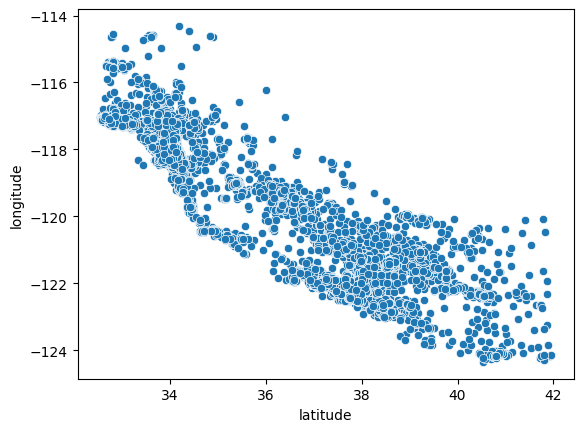

In [117]:
sns.scatterplot(data=df,
            x = 'latitude',
            y = 'longitude')
plt.show()

### Cleaning housing_median_age 

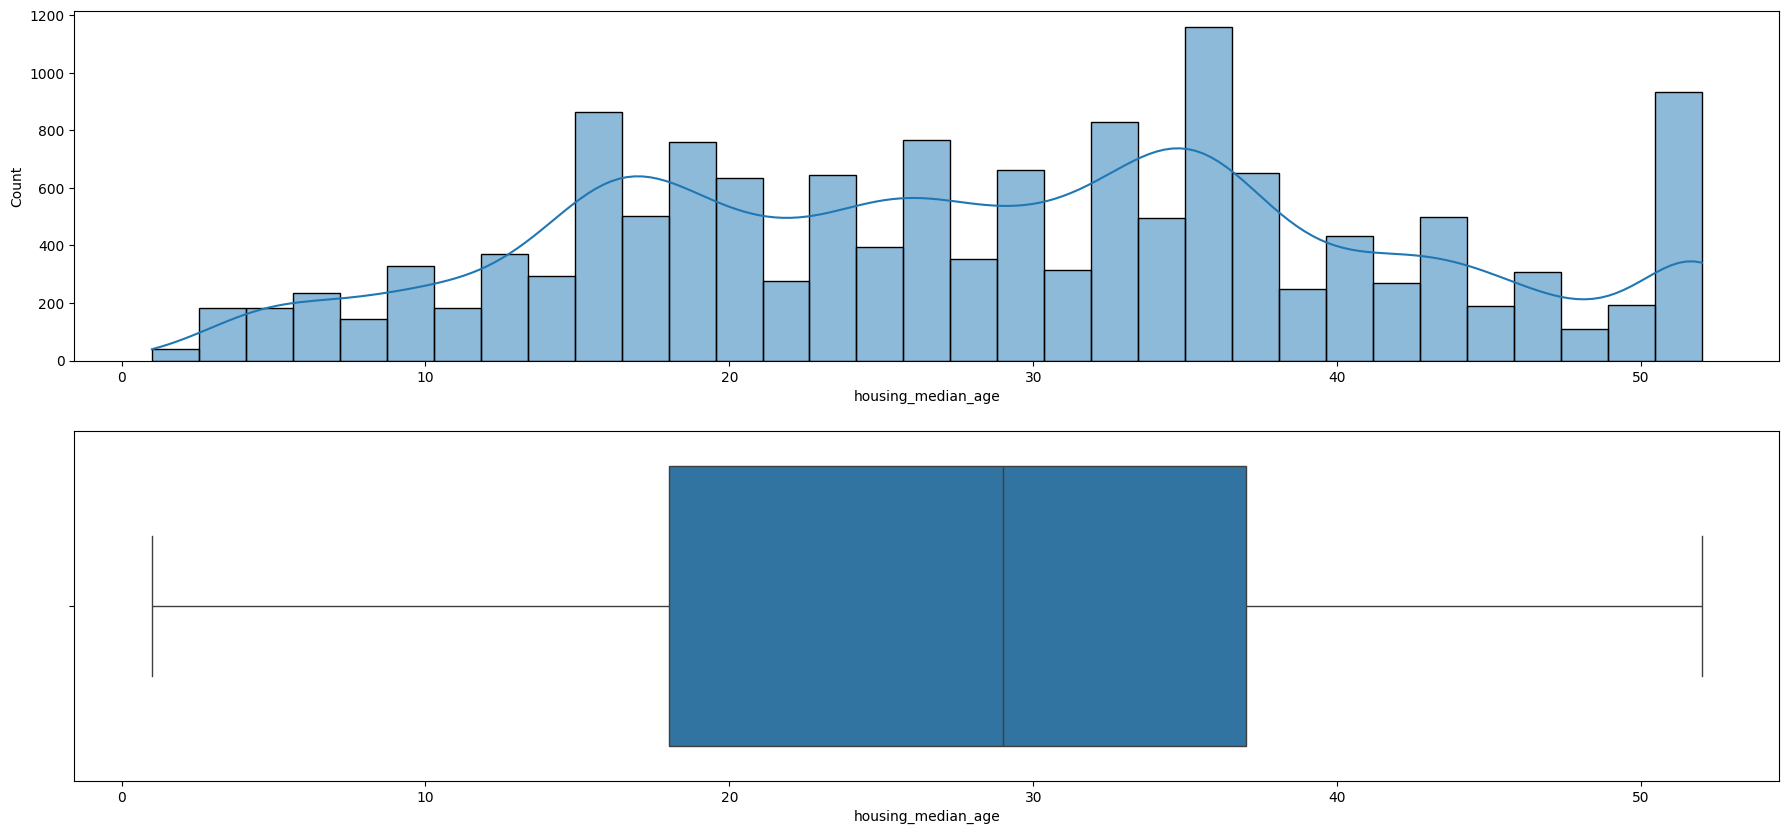

In [118]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df,
             x='housing_median_age',
             kde=True, ax = ax[0])
sns.boxplot(data=df,
            x = 'housing_median_age',
            ax = ax[1])
plt.show()

In [119]:
find_anomalies(df2['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


In [120]:
df2['housing_median_age'].skew()

np.float64(0.0589291851805334)

### Cleaning total_rooms

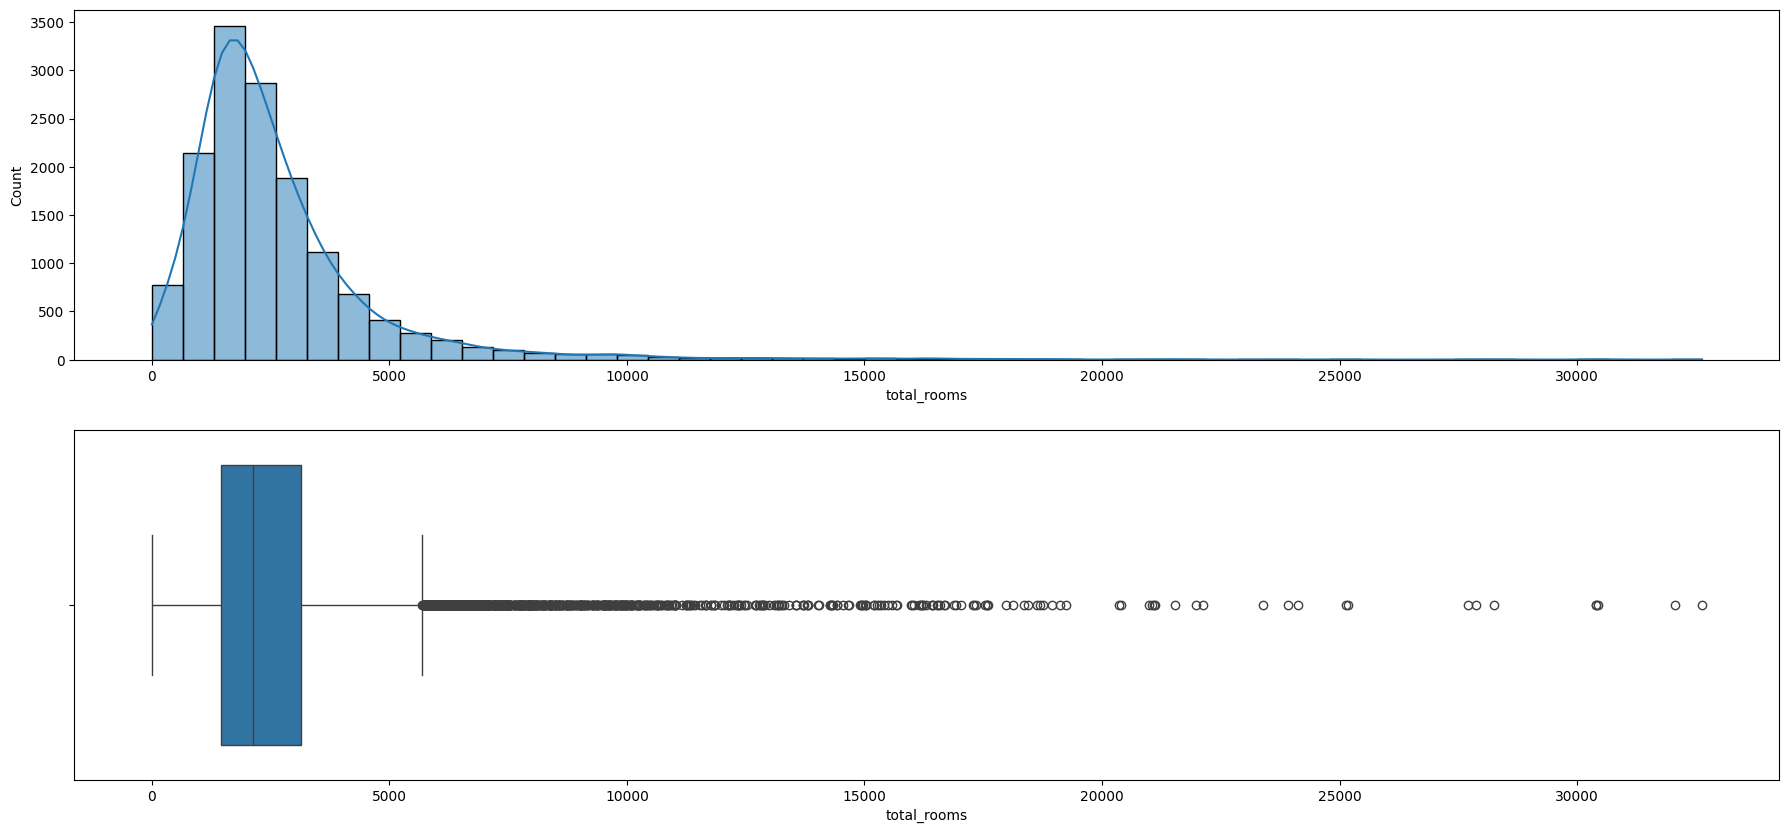

In [121]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df,
             x='total_rooms',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df,
            x = 'total_rooms',
            ax = ax[1])
plt.show()

In [122]:
find_anomalies(df2['total_rooms'])

IQR: 1697.0
limit_bawah: -1094.5
limit_atas: 5693.5


In [123]:
df2 = df2[df2['total_rooms'] < 5693]
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [124]:
df2['total_rooms'].skew()

np.float64(0.677068922543471)

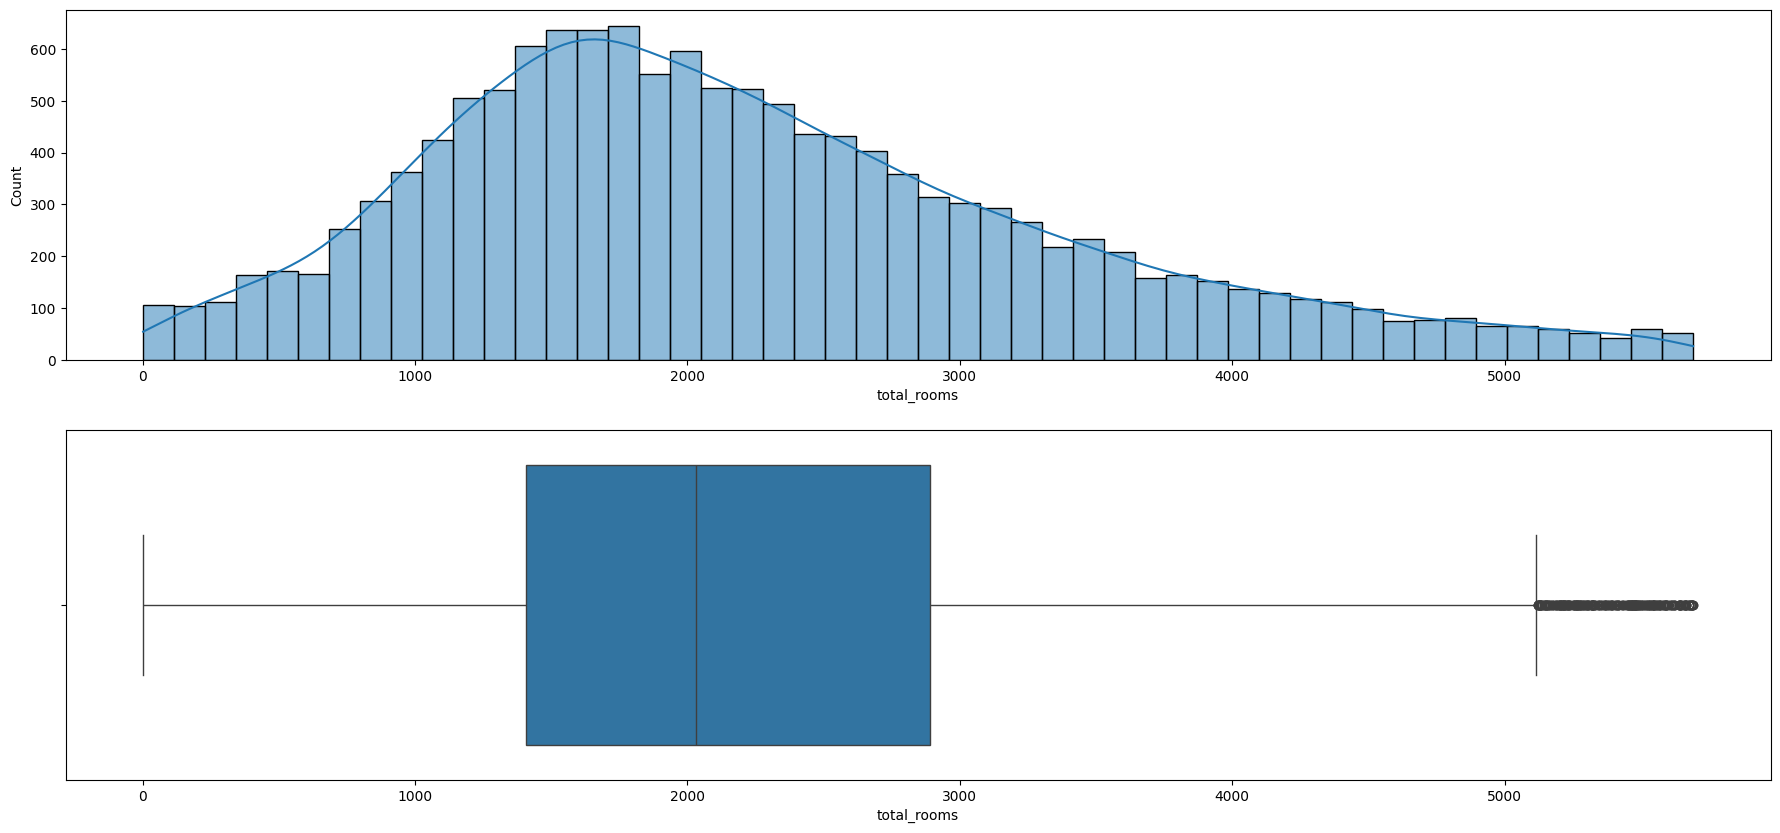

In [125]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df2,
             x='total_rooms',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df2,
            x = 'total_rooms',
            ax = ax[1])
plt.show()

In [126]:
df2['total_rooms'].skew()

np.float64(0.677068922543471)

### Cleaning total_bedrooms

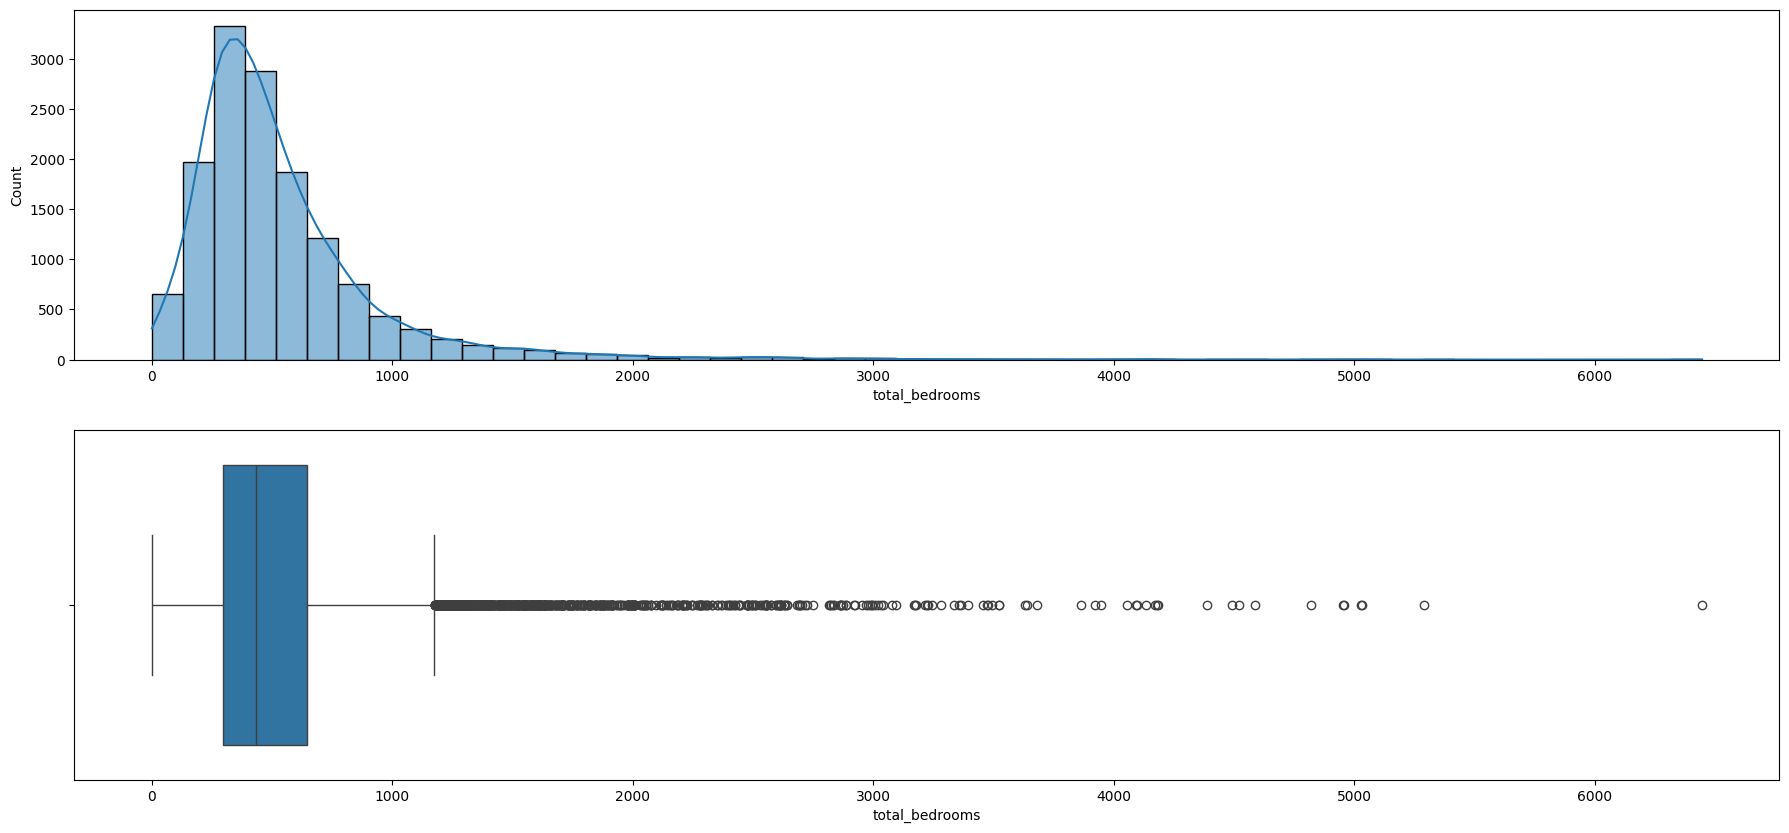

In [127]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df,
             x='total_bedrooms',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df,
            x = 'total_bedrooms',
            ax = ax[1])
plt.show()

In [128]:
find_anomalies(df2['total_bedrooms'])

IQR: 309.0
limit_bawah: -176.5
limit_atas: 1059.5


In [129]:
df2['total_bedrooms'].skew()

np.float64(1.1701077193476828)

In [130]:
df2 = df2[df2['total_bedrooms'] < 1059]
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
6,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,8.8470,<1H OCEAN,388700.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


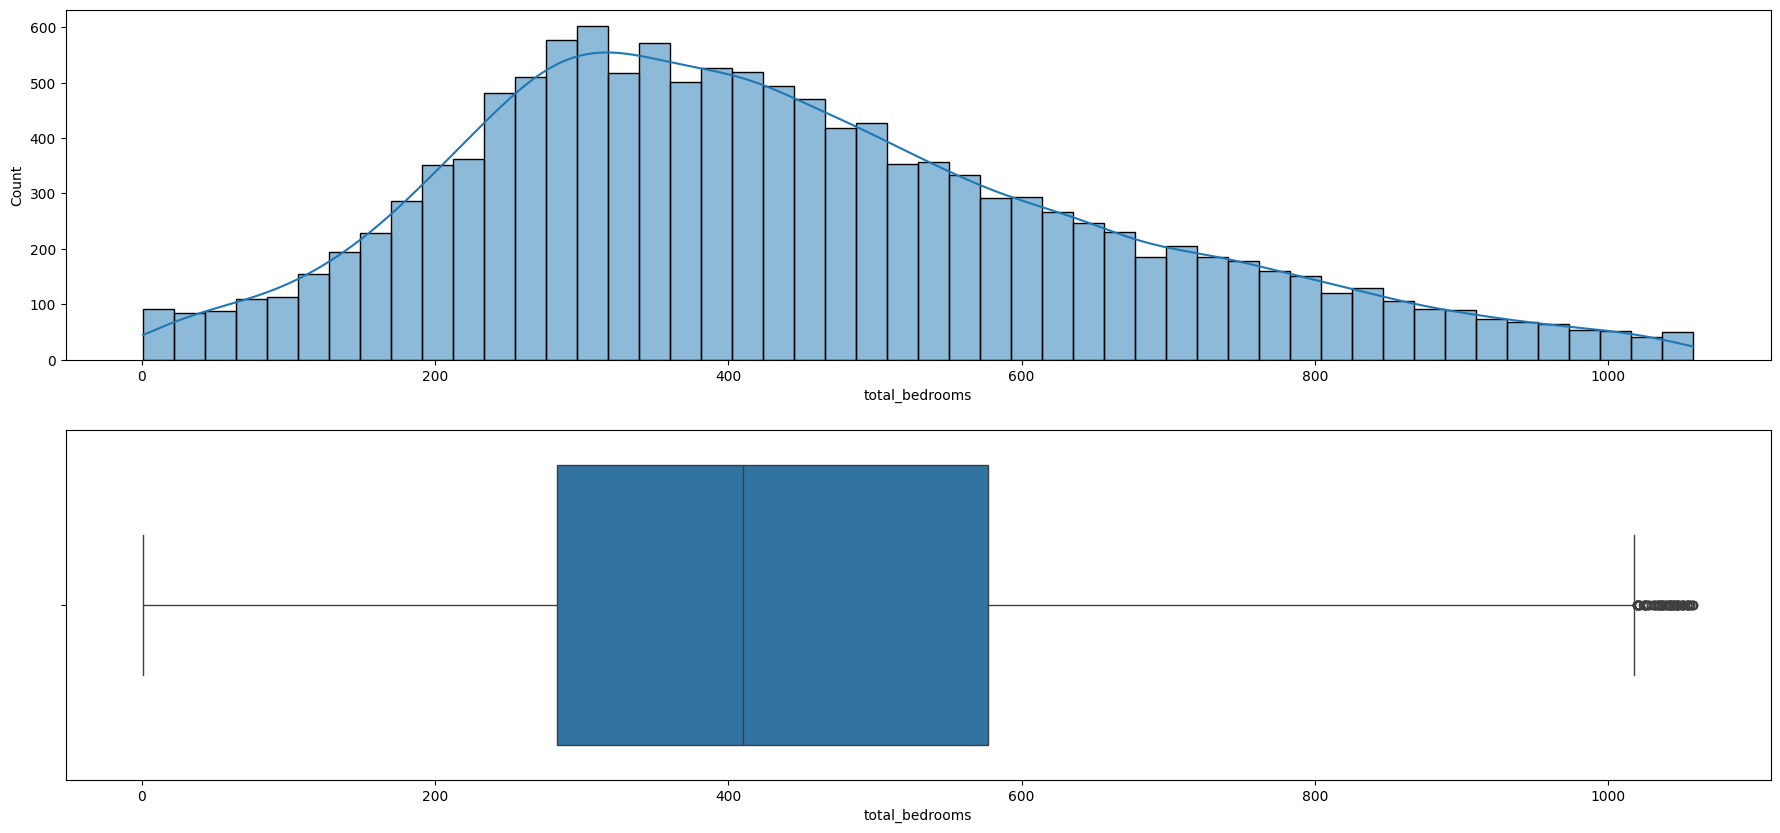

In [131]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df2,
             x='total_bedrooms',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df2,
            x = 'total_bedrooms',
            ax = ax[1])
plt.show()

In [132]:
df2['total_bedrooms'].skew()

np.float64(0.5296770991374345)

### Cleaning population

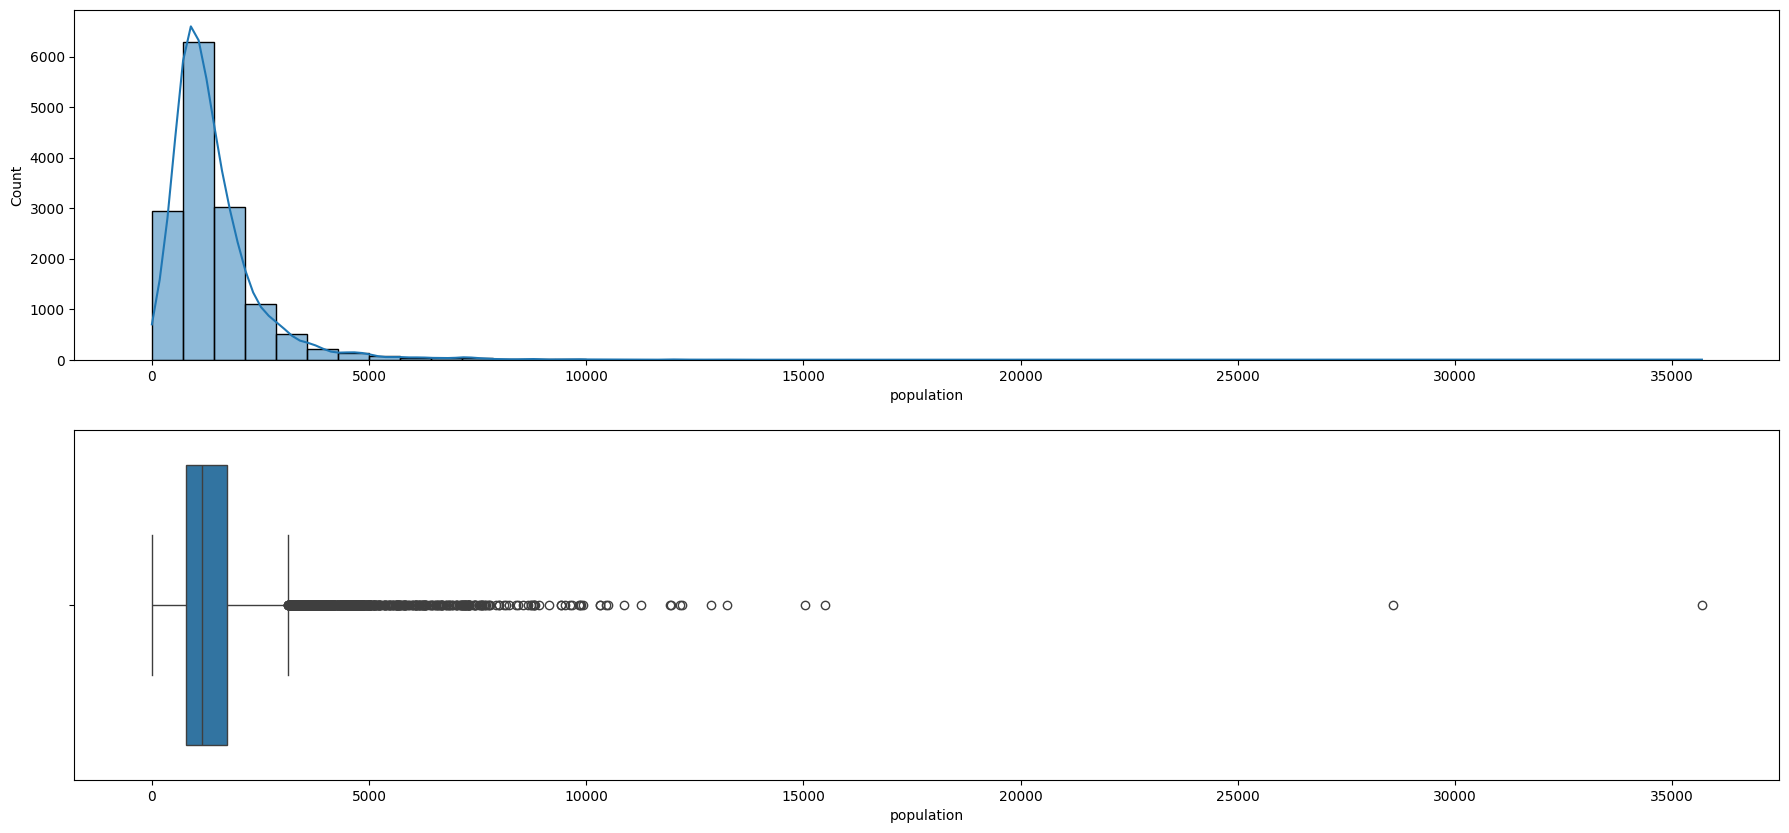

In [133]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df,
             x='population',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df,
            x = 'population',
            ax = ax[1])
plt.show()

In [134]:
find_anomalies(df2['population'])

IQR: 786.0
limit_bawah: -424.0
limit_atas: 2720.0


In [135]:
df2['population'].skew()

np.float64(1.2482140716195478)

In [136]:
df2 = df2[df2['population'] < 2720]
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
6,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,8.8470,<1H OCEAN,388700.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


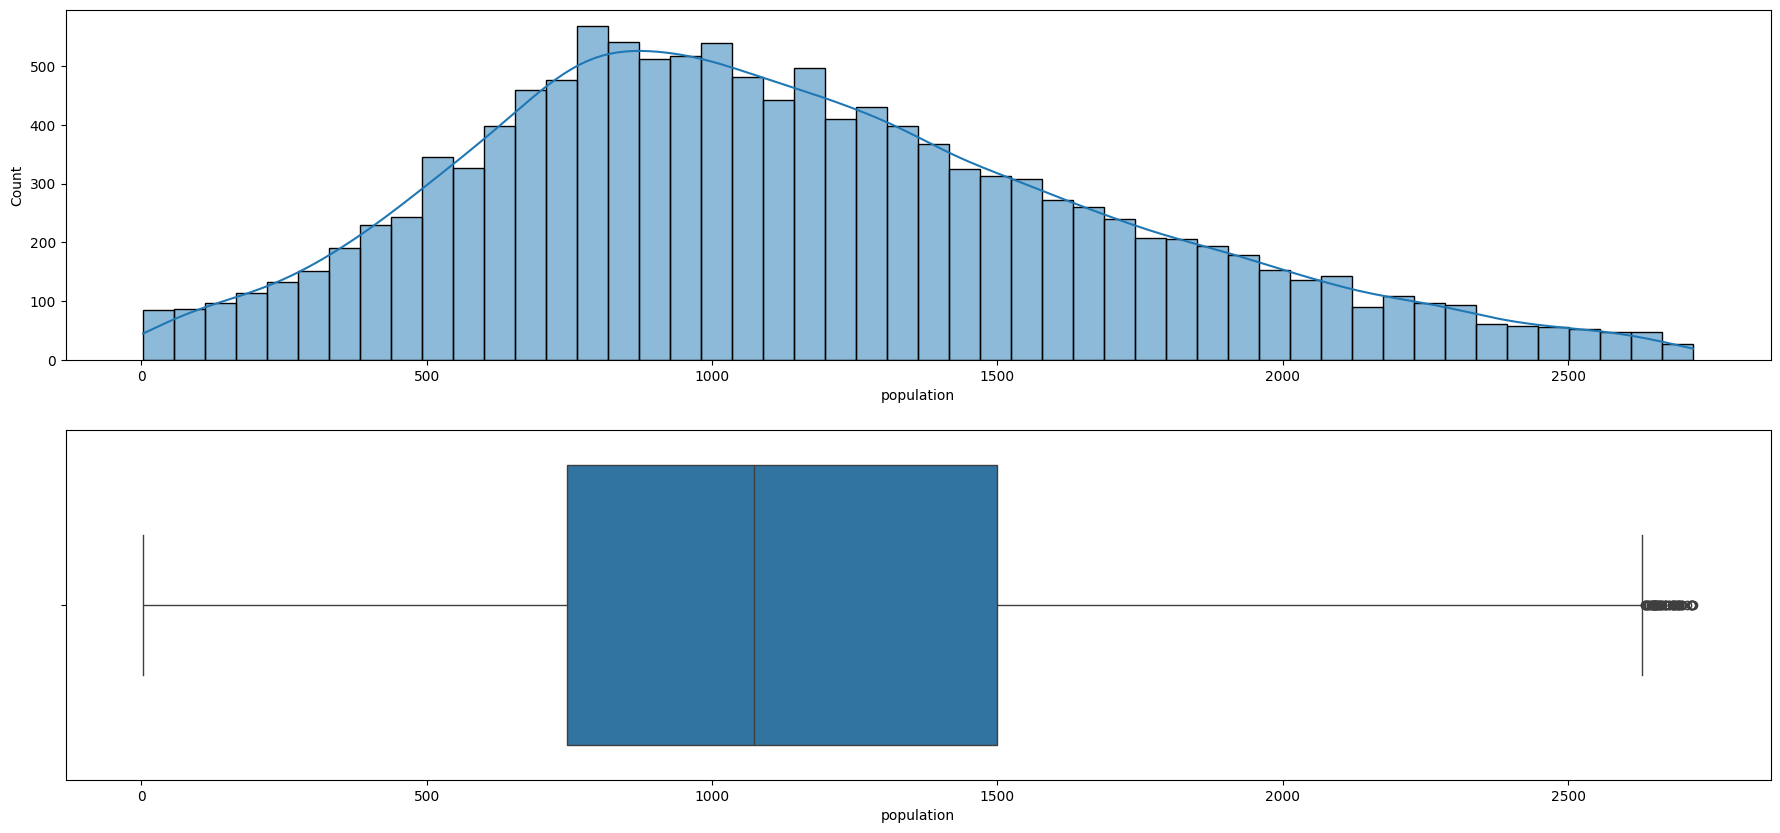

In [137]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df2,
             x='population',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df2,
            x = 'population',
            ax = ax[1])
plt.show()

In [138]:
df2['population'].skew()

np.float64(0.450509321965585)

### Cleaning households

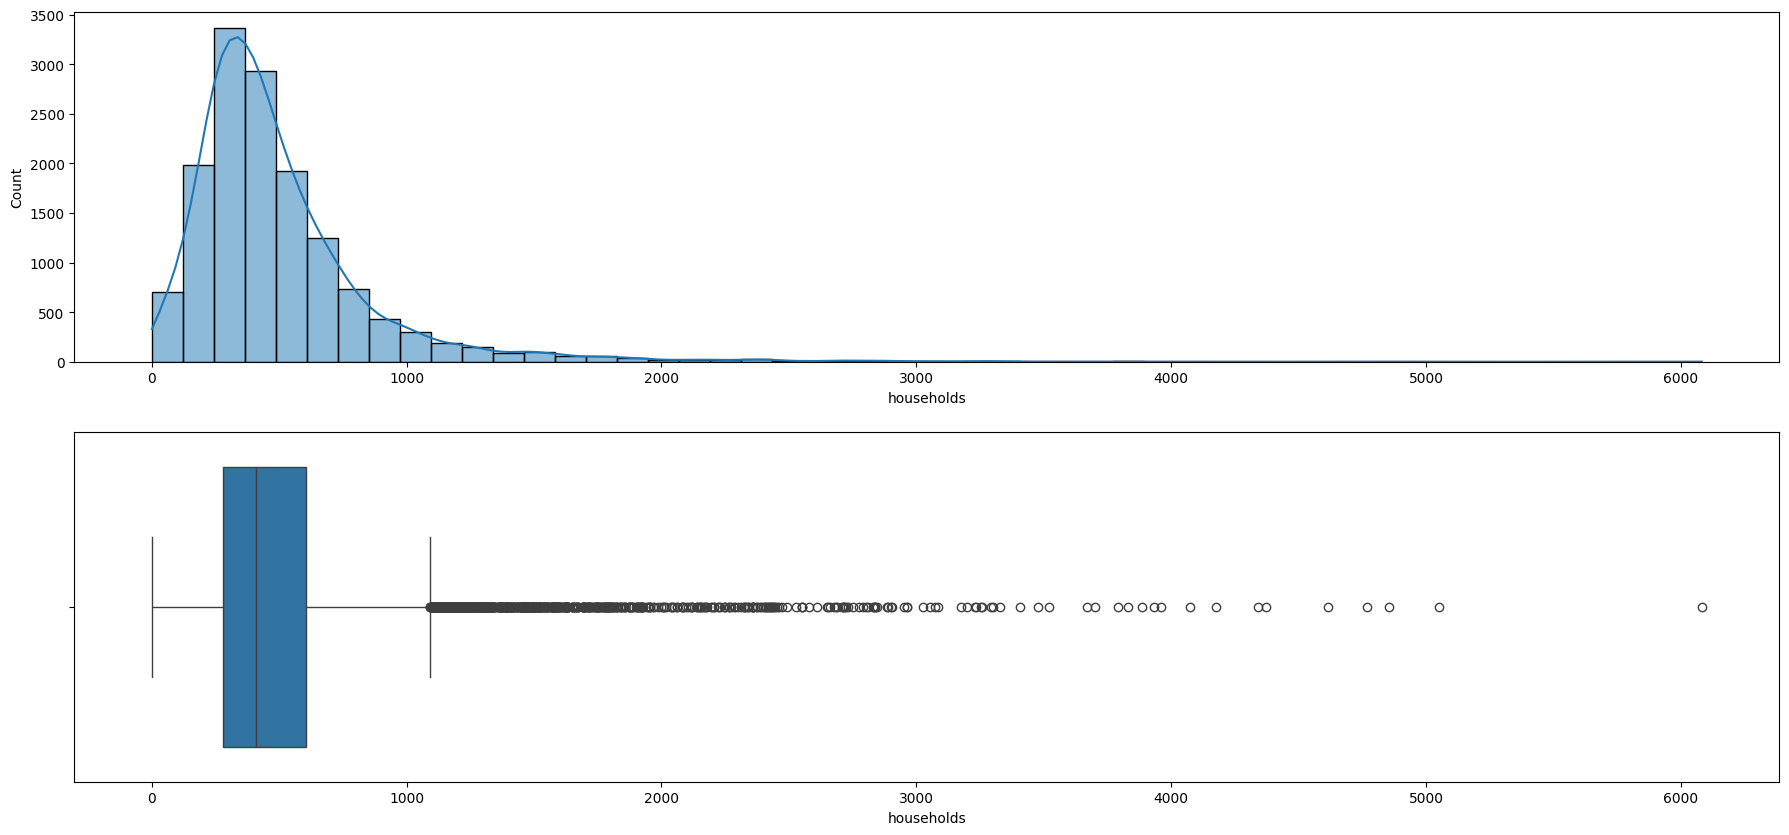

In [139]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df,
             x='households',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df,
            x = 'households',
            ax = ax[1])
plt.show()

In [140]:
find_anomalies(df2['households'])

IQR: 258.25
limit_bawah: -121.375
limit_atas: 911.625


In [141]:
df2 = df2[df2['households'] < 911]
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
6,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,8.8470,<1H OCEAN,388700.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


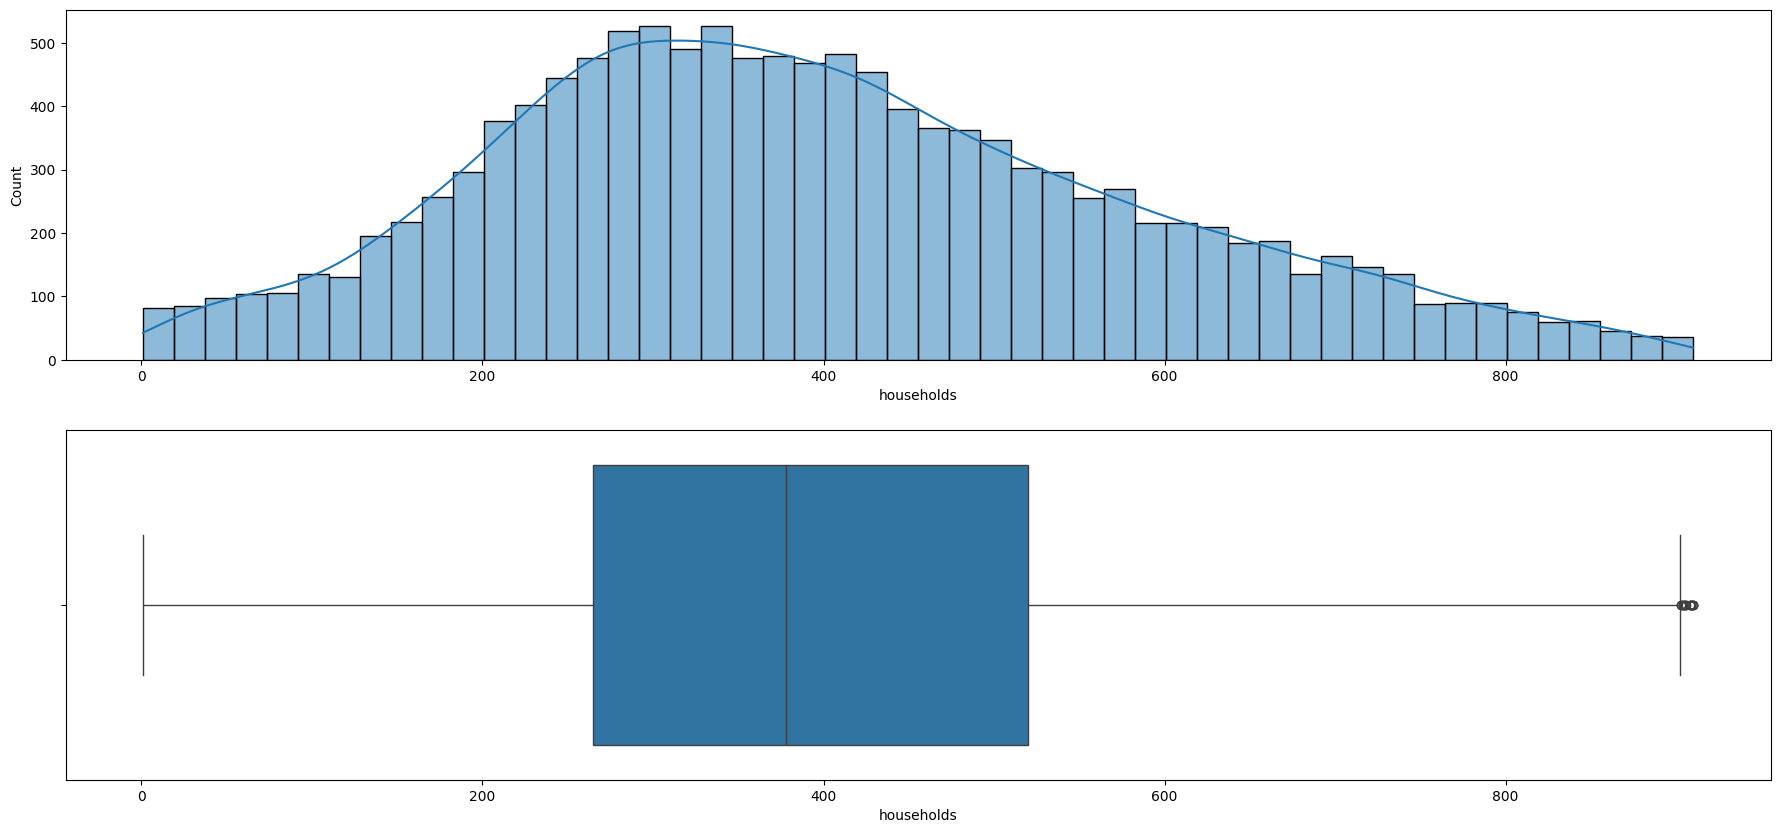

In [142]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df2,
             x='households',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df2,
            x = 'households',
            ax = ax[1])
plt.show()

In [143]:
df2['households'].skew()

np.float64(0.3732292273256696)

### Cleaning median_income

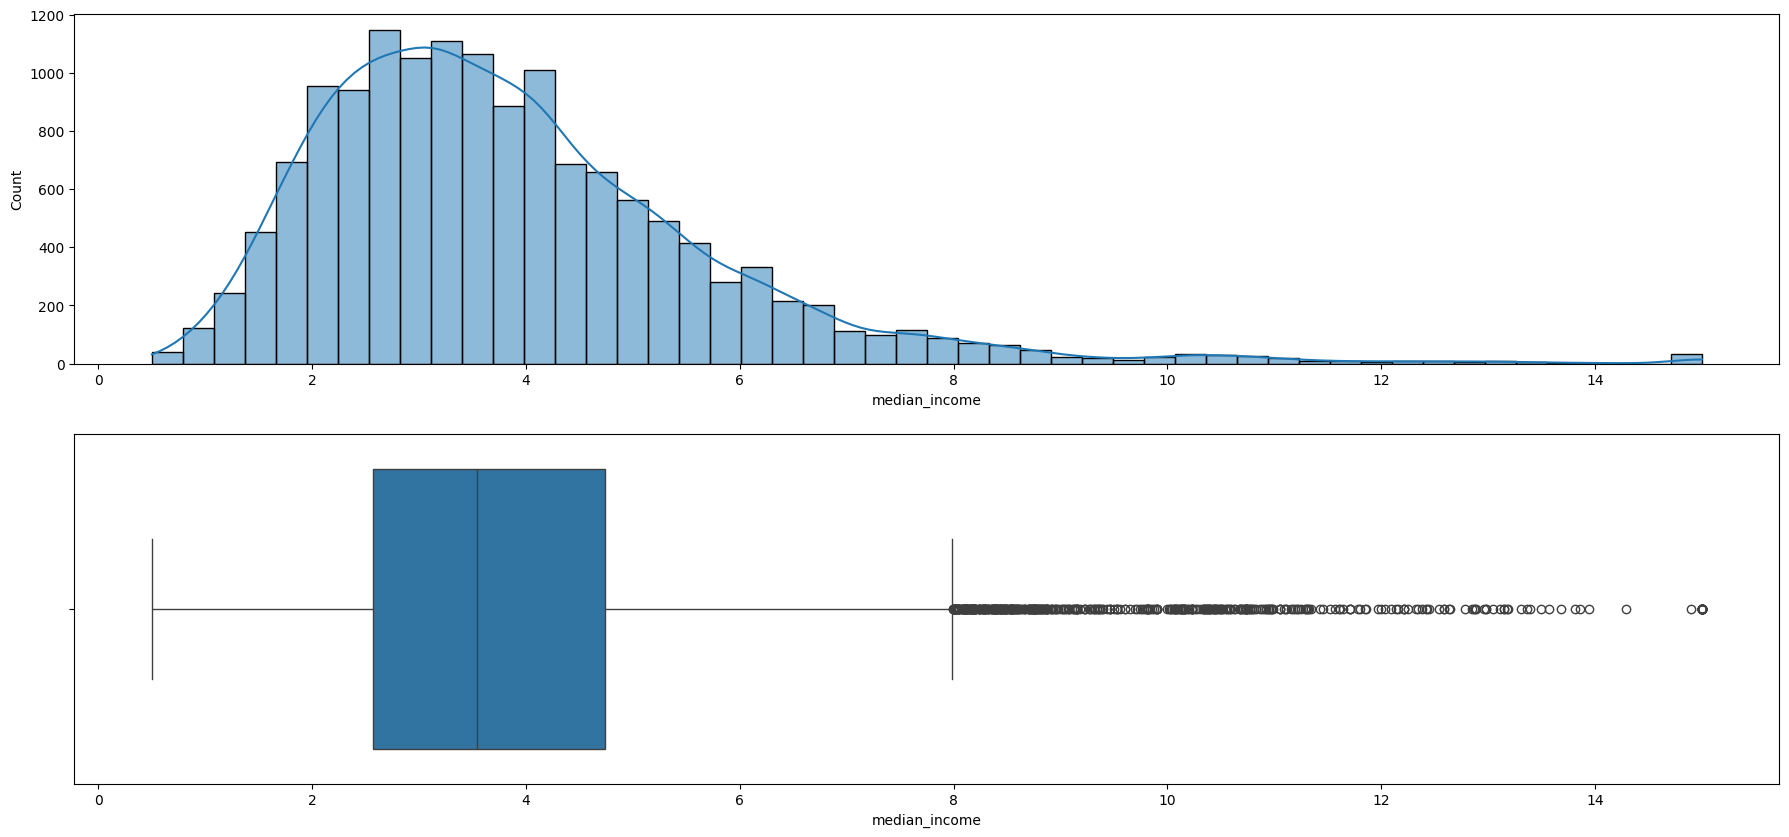

In [144]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df,
             x='median_income',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df,
            x = 'median_income',
            ax = ax[1])
plt.show()

In [145]:
find_anomalies(df2['median_income'])

IQR: 2.179225
limit_bawah: -0.7214624999999999
limit_atas: 7.9954375


In [146]:
df2['median_income'].skew()

np.float64(1.6561953859817924)

skew tinggin tapi ini households income, perlu riset 

In [147]:
df2 = df2[df2['households'] < 911]
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
6,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,8.8470,<1H OCEAN,388700.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


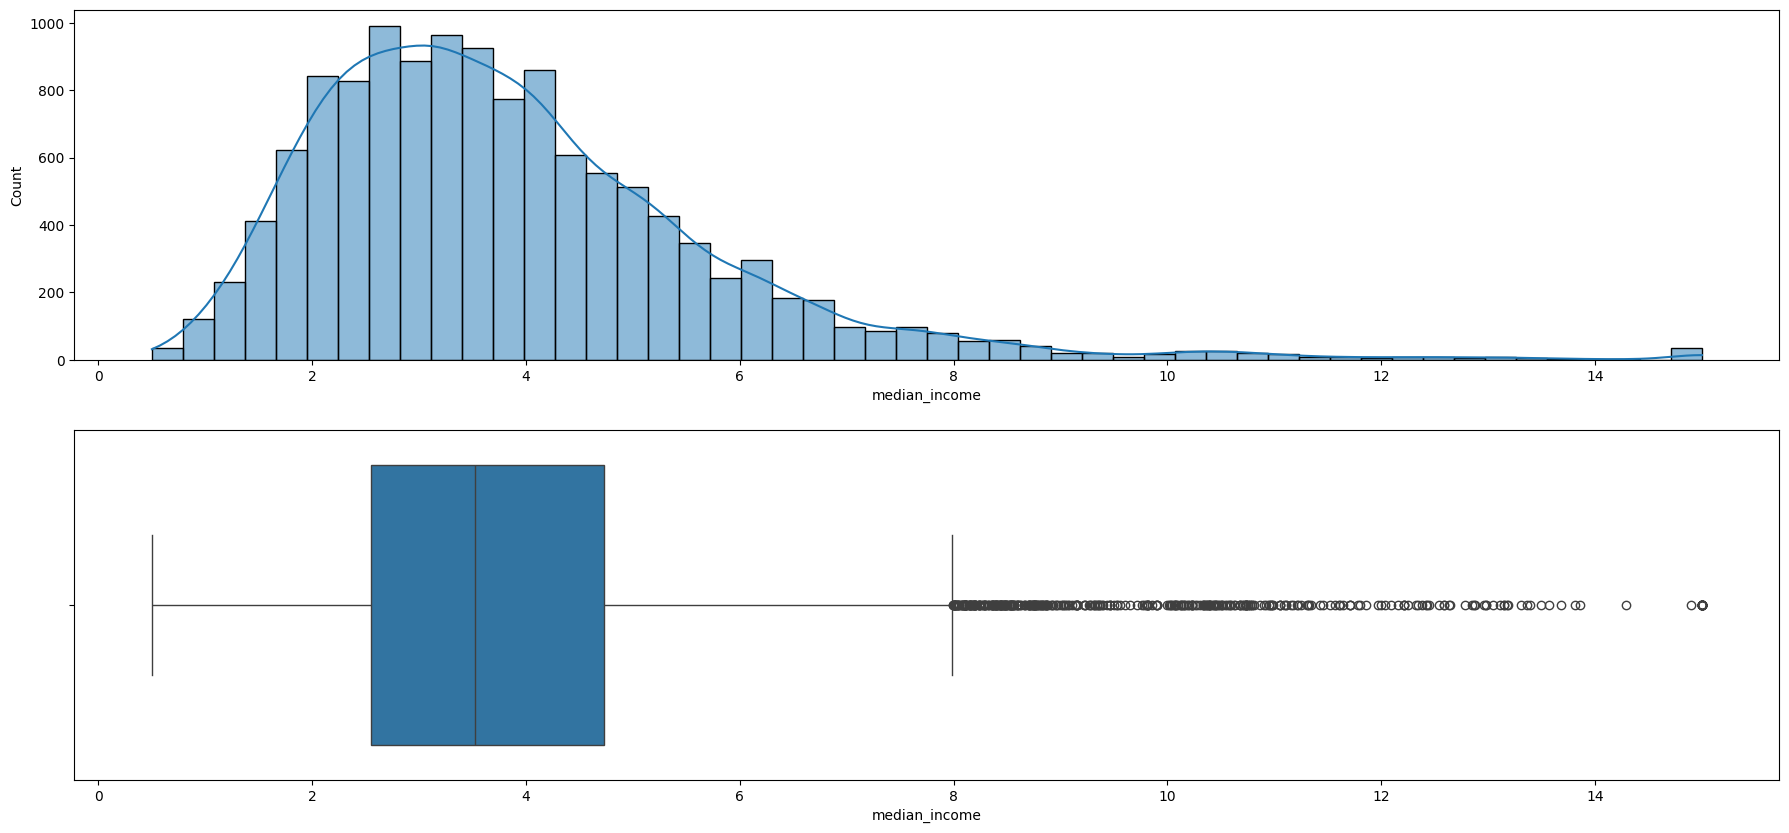

In [148]:
fig, ax = plt.subplots(2, 1, figsize=(22, 10))
sns.histplot(data=df2,
             x='median_income',
             kde=True, 
             bins=50,
             ax = ax[0])
sns.boxplot(data=df2,
            x = 'median_income',
            ax = ax[1])
plt.show()

### Cleaning ocean_proximity

i think this one is fine

In [149]:
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
6,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,8.8470,<1H OCEAN,388700.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [150]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [151]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [152]:
df['total_bedrooms'].mean()

np.float64(538.2607085458739)

In [7]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [8]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [154]:
df2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [155]:
df3 = df.copy()
df4 = df2.copy()

## Define X1 & y1, X2 & y2,  X3 & y3,  X4 & y4

In [ ]:
#ini yang tidak di cleaning
X1 = df.drop(columns='median_house_value')
y1 = df['median_house_value']
#ini yang di cleaning
X2 = df2.drop(columns='median_house_value')
y2 = df2['median_house_value']
#ini yang tidak di cleaning
X3 = df.drop(columns='median_house_value')
y3 = df['median_house_value']
#ini yang di cleaning
X4 = df2.drop(columns='median_house_value')
y4 = df2['median_house_value']
# X1, y1, X2, y2, X3, y3, X4, y4

In [ ]:
#train, test, split X1, y1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,
                 random_state=0,
                 test_size=0.2,
                 )

#train,test,split X2, y2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,
                 random_state=0,
                 test_size=0.2,
                 )

#train, test, split X3, y3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,
                 random_state=0,
                 test_size=0.2,
                 )

#train,test,split X4, y4
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,
                 random_state=0,
                 test_size=0.2,
                 )

In [5]:
# Baseline: predict the mean of y_train
y_pred_baseline = np.full_like(y1_test, y1_train.mean())

# Compute metrics
rmse_baseline = np.sqrt(mean_squared_error(y1_test, y_pred_baseline))
mae_baseline = mean_absolute_error(y1_test, y_pred_baseline)
mape_baseline = mean_absolute_percentage_error(y1_test, y_pred_baseline)

print(f"Baseline RMSE: {rmse_baseline:.2f}")
print(f"Baseline MAE: {mae_baseline:.2f}")
print(f"Baseline MAPE: {mape_baseline:.3f}")

Baseline RMSE: 114151.30
Baseline MAE: 90142.45
Baseline MAPE: 0.631


this time, i multiply by 2 because i want to try to model with each scaler (robust and standard). 
so: 
- X1, y1 use robust scaler and raw data (df)
- X2, y2 use standard scaler and cleaned data (df2)
- X3, y3 use standard scaler and raw data (df)
- X4, y4 use robust scaler and cleaned data (df2)

In [158]:
transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(handle_unknown='ignore', drop=None), ['ocean_proximity'])],
     remainder='passthrough'
)


transformer disini dipakai digunakan untuk encoding semua X1, y1 sampai X4, y4. dan karena categorical column cuma ada di `ocean_proximity` jadinya cuma itu yang di encoding. selain itu column lainnya tidak perlu di cleaning menggunakan iterative imputer dan scaling dilakukan saat cross validation

In [159]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
xgbrf = XGBRFRegressor(random_state=0)
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log1p, inverse_func=np.expm1)
log_knn = TransformedTargetRegressor(knn, func=np.log1p, inverse_func=np.expm1)
log_dt = TransformedTargetRegressor(dt, func=np.log1p, inverse_func=np.expm1)
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1)
log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)
log_xgbrf = TransformedTargetRegressor(xgbrf, func=np.log1p, inverse_func=np.expm1)

# Scaling data
stdscaler = StandardScaler()
rbsscaler = RobustScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb, xgbrf]
transformed_models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_xgbrf]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', rbsscaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X1_train, 
        y1_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    #print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X1_train, 
        y1_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    #print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X1_train, 
        y1_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    #print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in transformed_models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', rbsscaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X1_train, 
        y1_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    #print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X1_train, 
        y1_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    #print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X1_train, 
        y1_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    #print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [160]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'XGBRandomForest Regressor', 
              'Transformed Linear Regression', 'Transformed KNN Regressor', 'Transformed DecisionTree Regressor', 'Transformed RandomForest Regressor', 'Transformed XGBoost Regressor', 'Transformed XGBRandomForest Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-69040.768183,1838.549004,-50237.553005,723.624565,-0.289470,0.007904
1,KNN Regressor,-62860.231737,1881.955935,-43000.654356,737.110527,-0.235637,0.005942
2,DecisionTree Regressor,-69984.814461,1240.409152,-44725.373167,1034.128097,-0.244989,0.006179
3,RandomForest Regressor,-50541.487087,1694.557511,-33427.876261,668.332604,-0.186925,0.006857
4,XGBoost Regressor,-49423.353734,1589.403237,-32942.230362,612.263242,-0.183295,0.007750
5,XGBRandomForest Regressor,-63724.283627,1808.668824,-45017.555417,862.763741,-0.252744,0.006806
6,Transformed Linear Regression,-86750.863368,6770.570311,-51682.636465,1662.297411,-0.260020,0.003542
7,Transformed KNN Regressor,-63090.622759,1883.919090,-42250.202071,651.754306,-0.221565,0.005602
8,Transformed DecisionTree Regressor,-70531.505233,1962.857405,-45354.369167,1056.568565,-0.245723,0.007350
9,Transformed RandomForest Regressor,-51204.708295,2044.562386,-32780.297996,635.859125,-0.171448,0.005608


In [161]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
xgbrf = XGBRFRegressor(random_state=0)
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log1p, inverse_func=np.expm1)
log_knn = TransformedTargetRegressor(knn, func=np.log1p, inverse_func=np.expm1)
log_dt = TransformedTargetRegressor(dt, func=np.log1p, inverse_func=np.expm1)
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1)
log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)
log_xgbrf = TransformedTargetRegressor(xgbrf, func=np.log1p, inverse_func=np.expm1)

# Scaling data
stdscaler = StandardScaler()
rbsscaler = RobustScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb, xgbrf]
transformed_models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_xgbrf]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', stdscaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X2_train, 
        y2_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    #print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X2_train, 
        y2_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    #print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X2_train, 
        y2_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    #print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in transformed_models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', stdscaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X2_train, 
        y2_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    #print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X2_train, 
        y2_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    #print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X2_train, 
        y2_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    #print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [162]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'XGBRandomForest Regressor', 
              'Transformed Linear Regression', 'Transformed KNN Regressor', 'Transformed DecisionTree Regressor', 'Transformed RandomForest Regressor', 'Transformed XGBoost Regressor', 'Transformed XGBRandomForest Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-67773.248856,1597.709995,-49932.599724,925.275976,-0.294793,0.006722
1,KNN Regressor,-62989.032283,1592.745195,-42863.527049,1073.478238,-0.236356,0.013156
2,DecisionTree Regressor,-72985.257695,1308.573445,-47089.095584,828.351630,-0.259807,0.010830
3,RandomForest Regressor,-52683.299098,1571.116725,-34768.892583,983.621804,-0.196019,0.011568
4,XGBoost Regressor,-50884.361211,1785.835661,-33757.997765,726.180883,-0.189546,0.008739
5,XGBRandomForest Regressor,-64988.861111,1569.464984,-45826.219027,909.337222,-0.257677,0.009648
6,Transformed Linear Regression,-84690.631545,7307.851250,-50567.777249,1532.858223,-0.258556,0.006839
7,Transformed KNN Regressor,-63353.989289,1465.397177,-42178.721252,929.704286,-0.221671,0.010592
8,Transformed DecisionTree Regressor,-72826.775582,2419.901981,-47265.093023,1161.054241,-0.257492,0.014183
9,Transformed RandomForest Regressor,-52961.755596,1671.734856,-33861.363583,1112.186289,-0.178022,0.010884


In [163]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
xgbrf = XGBRFRegressor(random_state=0)
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log1p, inverse_func=np.expm1)
log_knn = TransformedTargetRegressor(knn, func=np.log1p, inverse_func=np.expm1)
log_dt = TransformedTargetRegressor(dt, func=np.log1p, inverse_func=np.expm1)
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1)
log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)
log_xgbrf = TransformedTargetRegressor(xgbrf, func=np.log1p, inverse_func=np.expm1)

# Scaling data
stdscaler = StandardScaler()
rbsscaler = RobustScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb, xgbrf]
transformed_models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_xgbrf]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', stdscaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X3_train, 
        y3_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    #print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X3_train, 
        y3_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    #print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X3_train, 
        y3_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    #print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in transformed_models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=3)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', stdscaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X3_train, 
        y3_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    #print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X3_train, 
        y3_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    #print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X3_train, 
        y3_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    #print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [164]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'XGBRandomForest Regressor',
              'Transformed Linear Regression', 'Transformed KNN Regressor', 'Transformed DecisionTree Regressor', 'Transformed RandomForest Regressor', 'Transformed XGBoost Regressor', 'Transformed XGBRandomForest Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-69040.768183,1838.549004,-50237.553005,723.624565,-0.289470,0.007904
1,KNN Regressor,-62773.733309,1867.210826,-42493.819086,842.277449,-0.230052,0.006463
2,DecisionTree Regressor,-69936.967405,1121.090501,-44665.985289,918.002360,-0.244639,0.005733
3,RandomForest Regressor,-50548.159991,1679.236845,-33430.776479,666.903044,-0.186950,0.006939
4,XGBoost Regressor,-49423.353734,1589.403237,-32942.230362,612.263242,-0.183295,0.007750
5,XGBRandomForest Regressor,-63724.283627,1808.668824,-45017.555417,862.763741,-0.252744,0.006806
6,Transformed Linear Regression,-86780.304715,7105.153236,-51661.750176,1321.752608,-0.259914,0.003279
7,Transformed KNN Regressor,-62941.570889,2073.306802,-41677.794540,1223.459403,-0.215486,0.004153
8,Transformed DecisionTree Regressor,-70883.690939,2633.872122,-45510.216928,1824.125068,-0.246281,0.011114
9,Transformed RandomForest Regressor,-51531.192613,1592.734559,-32879.087166,771.347946,-0.172026,0.004649


In [165]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
xgbrf = XGBRFRegressor(random_state=0)
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log1p, inverse_func=np.expm1)
log_knn = TransformedTargetRegressor(knn, func=np.log1p, inverse_func=np.expm1)
log_dt = TransformedTargetRegressor(dt, func=np.log1p, inverse_func=np.expm1)
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1)
log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)
log_xgbrf = TransformedTargetRegressor(xgbrf, func=np.log1p, inverse_func=np.expm1)
# Scaling data
stdscaler = StandardScaler()
rbsscaler = RobustScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb, xgbrf]
transformed_models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_xgbrf]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', rbsscaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X4_train, 
        y4_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    #print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X4_train, 
        y4_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    #print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X4_train, 
        y4_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    #print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in transformed_models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', rbsscaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X4_train, 
        y4_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    #print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X4_train, 
        y4_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    #print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X4_train, 
        y4_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    #print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [166]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'XGBRandomForest Regressor', 
              'Transformed Linear Regression', 'Transformed KNN Regressor', 'Transformed DecisionTree Regressor', 'Transformed RandomForest Regressor', 'Transformed XGBoost Regressor', 'Transformed XGBRandomForest Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-67773.248856,1597.709995,-49932.599724,925.275976,-0.294793,0.006722
1,KNN Regressor,-63433.470129,1704.751445,-43242.586611,1111.492910,-0.239436,0.012198
2,DecisionTree Regressor,-72904.160027,1291.334116,-47053.291472,798.979998,-0.259390,0.011123
3,RandomForest Regressor,-52671.451235,1559.927556,-34764.440934,969.541948,-0.196081,0.011508
4,XGBoost Regressor,-50884.361211,1785.835661,-33757.997765,726.180883,-0.189546,0.008739
5,XGBRandomForest Regressor,-64988.861111,1569.464984,-45826.219027,909.337222,-0.257677,0.009648
6,Transformed Linear Regression,-84690.631545,7307.851250,-50567.777249,1532.858223,-0.258556,0.006839
7,Transformed KNN Regressor,-63721.397620,1635.017441,-42527.384564,968.457544,-0.224428,0.009990
8,Transformed DecisionTree Regressor,-72928.220089,2481.000670,-47302.432403,1245.980029,-0.257602,0.014925
9,Transformed RandomForest Regressor,-52951.844418,1672.112024,-33853.865722,1098.443711,-0.178022,0.010911


based on this multiple tryouts, the best outcome is when we use x1 data and use standard scaler with the most impressive rmse in model normal xgboost regressor, transformed xgboost regressor slightly behind the normal one, and 3rd place is normal randomforest regressor.

## **Predict before tuning model**

In [171]:
# Benchmark 3 model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state=0),
    'XGB': XGBRegressor(random_state=0),
    'Transformed XGB': TransformedTargetRegressor(regressor=XGBRegressor(random_state=0), func=np.log1p, inverse_func=np.expm1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for name, estimator in models.items():
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', stdscaler),
        ('model', estimator)
    ])

    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_test)
    score_rmse.append(np.sqrt(mean_squared_error(y1_test, y1_pred)))
    score_mae.append(mean_absolute_error(y1_test, y1_pred))
    score_mape.append(mean_absolute_percentage_error(y1_test, y1_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,50386.679414,33337.277391,0.187669
XGB,48865.848493,32753.710570,0.187000
Transformed XGB,48203.011286,31652.709776,0.167941


in prediction transformed xgb has better rmse, mae, mape than normal xgb, but because before tuning normal xgb is better, in hyperparameter tuning i tune with normal xgb and transformed xgb

## Hyperparameter tuning normal xgb and transformed xgb

### **normal xgb**

In [205]:
# pipeline
pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('scaler', stdscaler),
        ('modeling', xgb)
    ])

# hyperparam
hyperparam = {

#XGBoost
    'modeling__n_estimators': [300, 400, 500], 
    'modeling__learning_rate': [0.01, 0.05, 0.1], 
    'modeling__max_depth': [5, 7, 10], 
    'modeling__subsample': [0.8, 1.0], 
    'modeling__colsample_bytree': [0.6, 0.8, 1.0], 
    'modeling__gamma': [0, 1],
    'modeling__reg_alpha': [0, 0.05, 0.1], 
    #'scaler': [stdscaler, rbsscaler]
}

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
rsearch = RandomizedSearchCV(
    estimator = pipe_prep_model, 
    param_distributions = hyperparam,
    n_iter = 500,
    verbose=2,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 0  
)
gridsearch = GridSearchCV(
    estimator = pipe_prep_model, 
    param_grid = hyperparam,
    verbose=2,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    #random_state = 0  
)

In [206]:
gridsearch.fit(X1_train, y1_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'modeling__colsample_bytree': [0.6, 0.8, ...], 'modeling__gamma': [0, 1], 'modeling__learning_rate': [0.01, 0.05, ...], 'modeling__max_depth': [5, 7, ...], ...}"
,scoring,"['neg_root_mean_squared_error', 'neg_mean_absolute_error', ...]"
,n_jobs,-1
,refit,'neg_root_mean_squared_error'
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehot', ...)]"


In [207]:
pd.DataFrame(gridsearch.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__colsample_bytree,param_modeling__gamma,param_modeling__learning_rate,param_modeling__max_depth,param_modeling__n_estimators,param_modeling__reg_alpha,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
88,6.621917,0.687766,0.016627,0.000886,0.6,0,0.05,7,500,0.10,...,614.871037,63,-0.182150,-0.175469,-0.169087,-0.166238,-0.169251,-0.172439,0.005716,107
250,6.314937,0.566996,0.016560,0.001673,0.6,1,0.05,7,500,0.10,...,614.871037,63,-0.182150,-0.175469,-0.169087,-0.166238,-0.169251,-0.172439,0.005716,107
86,6.082515,0.014889,0.014636,0.000448,0.6,0,0.05,7,500,0.05,...,616.867898,59,-0.182139,-0.175484,-0.169087,-0.166238,-0.169251,-0.172440,0.005713,111
248,5.896248,0.034194,0.014956,0.000866,0.6,1,0.05,7,500,0.05,...,616.867898,59,-0.182139,-0.175484,-0.169087,-0.166238,-0.169251,-0.172440,0.005713,111
84,6.259608,0.013324,0.014892,0.000309,0.6,0,0.05,7,500,0.00,...,616.868033,61,-0.182139,-0.175484,-0.169087,-0.166238,-0.169251,-0.172440,0.005713,109


In [208]:
gridsearch.best_estimator_

,steps,"[('preprocessing', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [209]:
gridsearch.best_score_

np.float64(-46808.70525572937)

In [ ]:
# # 1. Save the full GridSearchCV object (with cv_results_)
# joblib.dump(gridsearch, "gridsearch_normalxgbr_full.pkl")

# # 2. Extract the best estimator (only the tuned model)
# best_model1 = gridsearch.best_estimator_
# pickle.dump(best_model1, open("model_normal_xgbr.sav", "wb"))

save both model that have only best_estimator_ and also that have cv_result_ as backup

### **transformed xgboost**

In [191]:
log_xgb = TransformedTargetRegressor(regressor=XGBRegressor(random_state=0), func=np.log1p, inverse_func=np.expm1)
# pipeline
pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('scaler', stdscaler),
        ('modeling', log_xgb)
    ])

# hyperparam
hyperparam = {

#XGBoost
    'modeling__regressor__n_estimators': [300, 400, 500], 
    'modeling__regressor__learning_rate': [0.01, 0.05, 0.1], 
    'modeling__regressor__max_depth': [5, 7, 10], 
    'modeling__regressor__subsample': [0.8, 1.0], 
    'modeling__regressor__colsample_bytree': [0.6, 0.8, 1.0], 
    'modeling__regressor__gamma': [0, 1],
    'modeling__regressor__reg_alpha': [0, 0.05, 0.1], 
    #'scaler': [stdscaler, rbsscaler]
}

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
rsearch2 = RandomizedSearchCV(
    estimator = pipe_prep_model, 
    param_distributions = hyperparam,
    n_iter = 500,
    verbose=2,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 0  
)
gridsearch2= GridSearchCV(
    estimator = pipe_prep_model, 
    param_grid = hyperparam,
    verbose=2,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    #random_state = 0  
)

In [192]:
gridsearch2.fit(X1_train, y1_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


,estimator,"Pipeline(step...None, ...)))])"
,param_grid,"{'modeling__regressor__colsample_bytree': [0.6, 0.8, ...], 'modeling__regressor__gamma': [0, 1], 'modeling__regressor__learning_rate': [0.01, 0.05, ...], 'modeling__regressor__max_depth': [5, 7, ...], ...}"
,scoring,"['neg_root_mean_squared_error', 'neg_mean_absolute_error', ...]"
,n_jobs,-1
,refit,'neg_root_mean_squared_error'
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehot', ...)]"


In [193]:
pd.DataFrame(gridsearch2.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__regressor__colsample_bytree,param_modeling__regressor__gamma,param_modeling__regressor__learning_rate,param_modeling__regressor__max_depth,param_modeling__regressor__n_estimators,param_modeling__regressor__reg_alpha,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
408,6.152199,0.012969,0.014930,0.001287,0.8,0,0.05,7,500,0.0,...,687.395556,3,-0.164496,-0.159143,-0.153822,-0.151603,-0.154417,-0.156696,0.004609,1
412,6.656465,0.649591,0.015151,0.000889,0.8,0,0.05,7,500,0.1,...,608.747412,12,-0.165755,-0.159725,-0.154636,-0.152440,-0.154051,-0.157321,0.004871,13
431,16.034721,0.156649,0.020994,0.003455,0.8,0,0.05,10,500,0.1,...,685.947300,1,-0.165612,-0.160187,-0.153987,-0.152253,-0.153014,-0.157010,0.005135,6
425,17.227757,0.027743,0.021979,0.004094,0.8,0,0.05,10,400,0.1,...,682.877586,2,-0.165631,-0.160163,-0.154071,-0.152327,-0.153067,-0.157052,0.005106,7
430,20.382037,1.901020,0.022583,0.002070,0.8,0,0.05,10,500,0.1,...,595.812483,5,-0.163392,-0.159799,-0.154926,-0.152626,-0.153267,-0.156802,0.004144,2


In [194]:
gridsearch2.best_estimator_

,steps,"[('preprocessing', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [195]:
gridsearch2.best_score_

np.float64(-47440.05897435231)

based on hyperparameter tuning, normal xgboost is slightly better with rmse of 46808 than transformed xgboost with rmse of 47440. but overall tuning both model makes rmse smaller which is good.

## **Final Prediction**

In [ ]:
# Assume you already tuned both
best_xgb = gridsearch.best_estimator_
best_log_xgb = gridsearch2.best_estimator_

# Store in dict for looping
tuned_models = {
    "XGB (Tuned)": best_xgb,
    "Transformed XGB (Tuned)": best_log_xgb
}

# Evaluate
score_rmse, score_mae, score_mape = [], [], []

for name, model in tuned_models.items():
    model.fit(X1_train, y1_train)   # refit on training set
    y_pred = model.predict(X1_test) 

    score_rmse.append(np.sqrt(mean_squared_error(y1_test, y_pred)))
    score_mae.append(mean_absolute_error(y1_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y1_test, y_pred))

# Save results
score_after_tuning = pd.DataFrame({
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape
}, index=tuned_models.keys())

score_after_tuning

,RMSE,MAE,MAPE
XGB (Tuned),45964.023161,30781.209424,0.175253
Transformed XGB (Tuned),46564.677258,29966.121437,0.159083


in final prediction, normal xgb turnsout to be better model than transformed xgb in RMSE, but in MAE and MAPE transformed xgb still has slight upperhand.

### **Comparison tuning**

**Normal XGBoostRegressor** with X1, y1

- RMSE, MAE, MAPE before tuning: 48865.848493,	32753.710570,	0.187000
- RMSE, MAE, MAPE after tuning: 45964.023161,	30781.209424,	0.175253

**Transformed XGBoostRegressor (with Log)** with X1, y1

- RMSE, MAE, MAPE before tuning: 48203.011286,	31652.709776,	0.167941
- RMSE, MAE, MAPE after tuning: 46564.677258,	29966.121437,	0.159083

both normal XGBRegressor and Transformed (Log) XGBRegressor that has been tuned, success to minimize RMSE, MAE, and MAPE

**Important Note**

For people who want to have optimum prediction `meadian house value`, we need some rules, use normal xgb after tuning model to predicts luxury homes because rmse is better than transformed xgb after tuning, but if you want to predict cheaper homes or just average, better using transformed xgb model because MAPE slightly lower than normal xgb

**Example**
If you think $46K error lower than 16% house price, use normal xgb, else use transformed xgb model

so what is exact house price that need to use transformed xgb model after tuning:
$46K x 100 / 16 = $287.5K

*`use transformed xgb after tuning < median house value = $287.5K < use normal xgb after tuning`*

In [ ]:
# print(type(gridsearch))
# print(hasattr(gridsearch, "cv_results_"))
# print(hasattr(gridsearch, "best_estimator_"))
# print(gridsearch.__dict__.keys())  # shows what attributes exist

<class 'sklearn.model_selection._search.GridSearchCV'>
False
False
dict_keys(['scoring', 'estimator', 'n_jobs', 'refit', 'cv', 'verbose', 'pre_dispatch', 'error_score', 'return_train_score', 'param_grid'])


In [ ]:
# print(type(gridsearch2))
# print(hasattr(gridsearch2, "cv_results_"))
# print(hasattr(gridsearch2, "best_estimator_"))
# print(gridsearch2.__dict__.keys())  # shows what attributes exist

<class 'sklearn.model_selection._search.GridSearchCV'>
True
True
dict_keys(['scoring', 'estimator', 'n_jobs', 'refit', 'cv', 'verbose', 'pre_dispatch', 'error_score', 'return_train_score', 'param_grid', 'multimetric_', 'best_index_', 'best_score_', 'best_params_', 'best_estimator_', 'refit_time_', 'feature_names_in_', 'scorer_', 'cv_results_', 'n_splits_'])


In [ ]:
# # 1. Save the full GridSearchCV object (with cv_results_)
# joblib.dump(gridsearch2, "gridsearch2_transformed_full.pkl")

# # 2. Extract the best estimator (only the tuned model)
# best_model = gridsearch2.best_estimator_
# pickle.dump(best_model, open("model_transformed_xgbr.sav", "wb"))

save both model that have only best_estimator_ and also that have cv_result_ as backup

In [ ]:
# # --- Load the saved pipeline ---
# pipeline = pickle.load(open("model_normal_xgbr.sav", "rb"))

load 1 of them when needed or just shortcut the process of fitting

In [18]:
y_pred = pipeline.predict(X1_test)

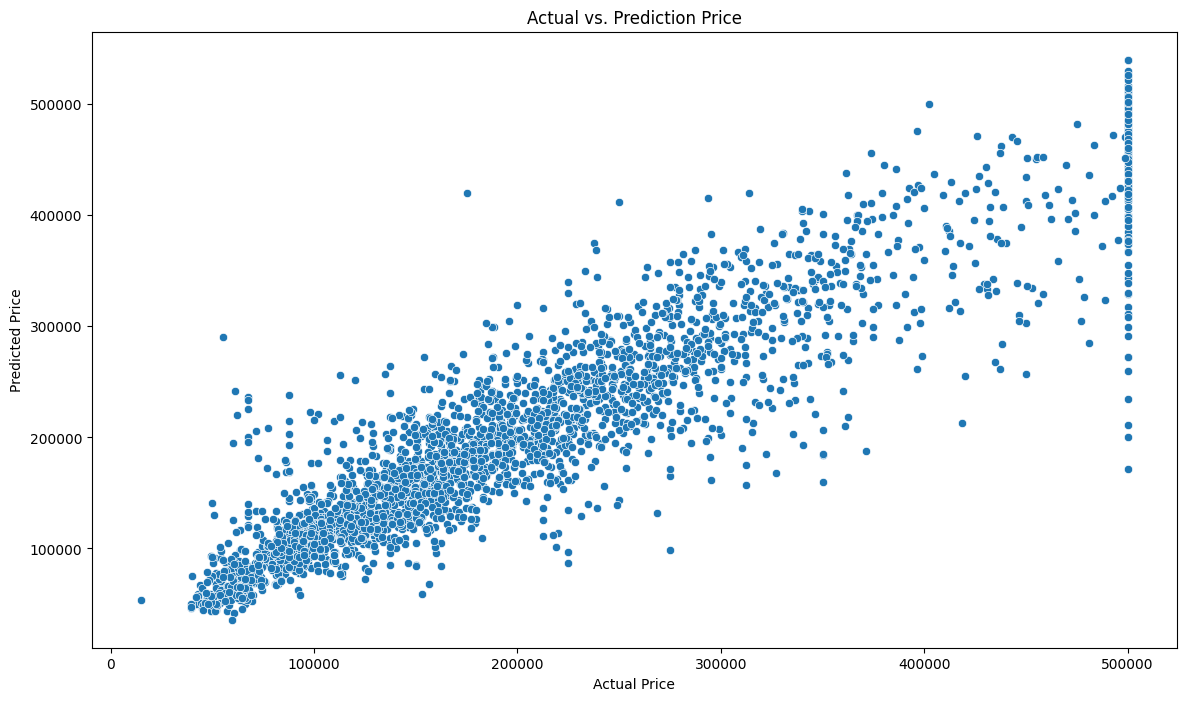

In [19]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y1_test, y=y_pred).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

## **Interpretation of Actual vs Predicted Scatterplot**

### **Diagonal Trend**
The strong diagonal pattern shows that the model captures the general relationship between features and housing prices. Predictions follow actual prices closely up to around $500,000, which indicates solid performance in this range.

### **Spread of Predictions**
There is some scatter around the diagonal line, especially for mid-range values. This spread reflects noise in the data and highlights that while the model predicts well on average, individual houses may still have noticeable errors.

### **Capping Effect at $500,000**
A large concentration of points aligns with the actual price of $500,000. This is due to a cap in the dataset rather than market behavior. As a result, the model struggles in this region, producing varied predictions where the target values are artificially fixed.

### **Implications**
The model is reliable for estimating homes below the $500,000 threshold, but predictions for higher-valued properties should be treated with caution. This limitation comes from the dataset itself, not necessarily the algorithm.

In [20]:
df[df['median_house_value'] > 500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8,-117.65,33.48,6.0,1638.0,188.0,572.0,174.0,13.0502,<1H OCEAN,500001.0
43,-122.21,37.37,34.0,1476.0,217.0,613.0,223.0,8.2883,NEAR OCEAN,500001.0
133,-122.44,37.80,52.0,3257.0,735.0,1045.0,620.0,4.5523,NEAR BAY,500001.0
201,-122.42,37.80,52.0,4079.0,1112.0,1466.0,1024.0,4.5913,NEAR BAY,500001.0
236,-121.89,37.46,5.0,1519.0,186.0,705.0,186.0,10.3798,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
14325,-118.44,34.07,26.0,3535.0,748.0,1322.0,666.0,7.1674,<1H OCEAN,500001.0
14328,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,<1H OCEAN,500001.0
14371,-122.02,37.29,18.0,2550.0,312.0,999.0,320.0,8.7939,<1H OCEAN,500001.0
14377,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,<1H OCEAN,500001.0


base on dataset, people who collect the data median_house_value only write 500001 for group of houses that estimated more than $500K

In [21]:
len(df[df['median_house_value'] > 500000])/len(df)  

0.046926910299003324

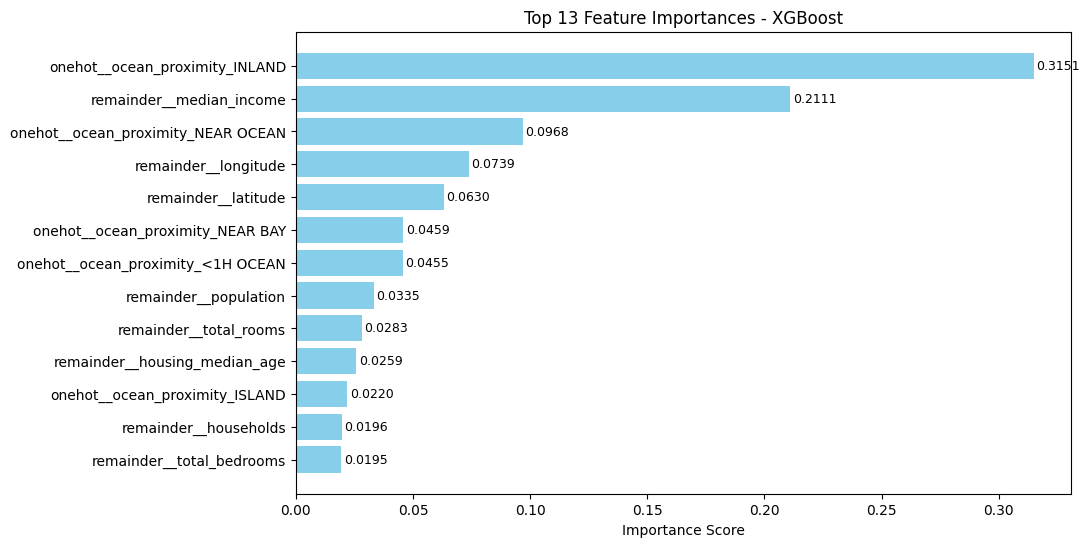

In [2]:
# --- Load the saved pipeline ---
pipeline = pickle.load(open("model_normal_xgbr.sav", "rb"))

# --- Extract the XGBoost model + feature names ---
xgb_model = pipeline.named_steps['modeling']
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()

# --- Match feature names with importances ---
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
})

# --- Sort & select top N ---
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)
top_n = 13  # adjust as you want
top_feats = feat_importances.head(top_n)

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = plt.barh(top_feats['Feature'], top_feats['Importance'], color="skyblue")
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} Feature Importances - XGBoost")
plt.xlabel("Importance Score")

# --- Add text labels ---
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f"{width:.4f}", va='center', fontsize=9)

plt.show()

## **Interpretation of Feature Importances**

### **Dominant Drivers**
The model highlights ocean proximity (INLAND) and median income as the strongest predictors of housing prices. Together, these features capture both geographic desirability and the economic profile of households.

### **Supporting Factors**
Other location-based variables like longitude and latitude also carry weight, reflecting how housing value is tied to spatial distribution in California. Proximity to the ocean in its various categories (NEAR OCEAN, NEAR BAY, <1H OCEAN) further reinforces the importance of geography.

### **Lesser Contributions**
Features such as total rooms, population, and housing median age still contribute but to a much smaller degree. This suggests that while physical and demographic attributes matter, they are secondary to location and income.

In [3]:
feature_names

array(['onehot__ocean_proximity_<1H OCEAN',
       'onehot__ocean_proximity_INLAND', 'onehot__ocean_proximity_ISLAND',
       'onehot__ocean_proximity_NEAR BAY',
       'onehot__ocean_proximity_NEAR OCEAN', 'remainder__longitude',
       'remainder__latitude', 'remainder__housing_median_age',
       'remainder__total_rooms', 'remainder__total_bedrooms',
       'remainder__population', 'remainder__households',
       'remainder__median_income'], dtype=object)

In [4]:
import shap
from sklearn.inspection import PartialDependenceDisplay

c:\Users\Ivan\Documents\PythonP\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


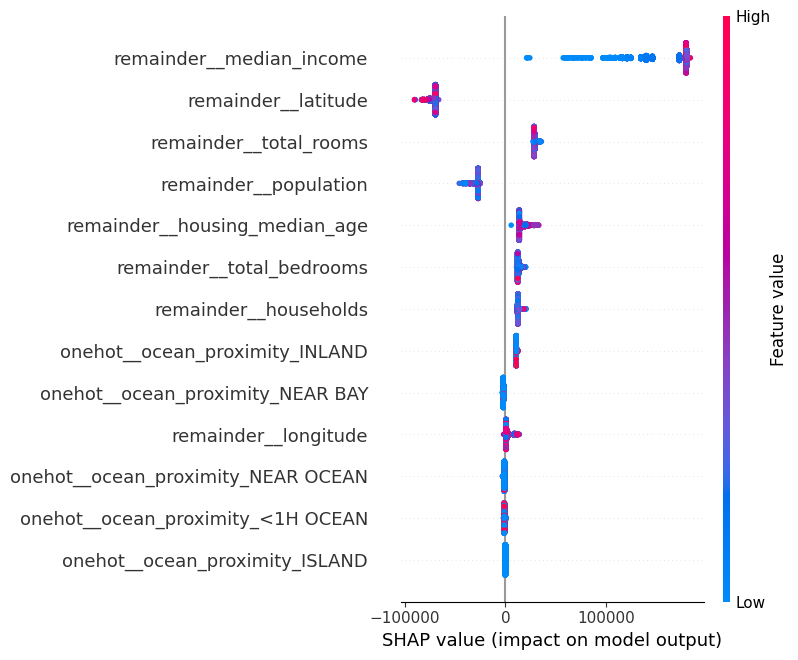

In [11]:
# Get model and preprocessor
xgb_model = pipeline.named_steps['modeling']
preprocessor = pipeline.named_steps['preprocessing']

# Transform X_test with the pipeline's preprocessing
X_test_transformed = preprocessor.transform(X1_test)

# SHAP with tree explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_transformed)

# Plot summary
shap.summary_plot(shap_values, X_test_transformed, feature_names=preprocessor.get_feature_names_out())

## **Interpretation of SHAP Summary Plot**

### **Key Insights on Median Income**
The SHAP plot confirms that median income has a strong positive impact. Higher income values are consistently linked to higher predicted housing prices, and this effect is linear and clear across the data.

### **Geographic Features**
Latitude and longitude both play noticeable roles, though in different directions. SHAP values suggest that being in certain coastal areas increases predicted price, while inland positioning (especially the INLAND category) often lowers it.

### **Smaller but Noticeable Impacts**
Variables like total rooms, population, and housing median age show mixed influence with smaller SHAP ranges. This means their effect on housing price is present but context-dependent, adding nuance rather than being main drivers.

### **Overall Reflection**
Taken together, SHAP complements feature importance by showing how and in what direction these features matter. The model is largely shaped by economic capacity and geographic desirability, with secondary contributions from household and structural variables.

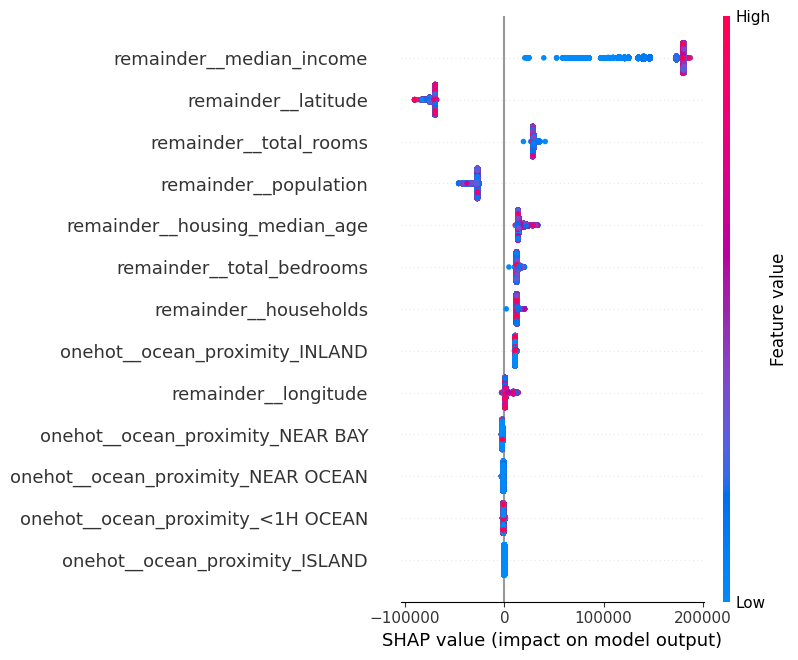

In [12]:
# Get model and preprocessor
xgb_model = pipeline.named_steps['modeling']
preprocessor = pipeline.named_steps['preprocessing']

# Transform X_test with the pipeline's preprocessing
X_train_transformed = preprocessor.transform(X1_train)

# SHAP with tree explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train_transformed)

# Plot summary
shap.summary_plot(shap_values, X_train_transformed, feature_names=preprocessor.get_feature_names_out())

## **Conclusion**

This project tested two machine learning models—tuned normal XGBoost and tuned transformed XGBoost—to predict California housing prices. Both delivered relatively strong performance given the historical dataset:

- Normal XGB: RMSE ≈ 45,964, MAE ≈ 30,781, MAPE ≈ 0.175

- Transformed XGB: RMSE ≈ 46,564, MAE ≈ 29,966, MAPE ≈ 0.159

These metrics suggest the models predict within ~15–17% of actual prices on average, which is solid for broad housing trends. The scatterplot confirmed strong alignment under $500K home values, though higher-value homes show larger deviations.

Feature importance and SHAP analysis consistently pointed to median income and ocean proximity as the strongest predictors, supported by geographic (longitude/latitude) and demographic (rooms, population) variables. While these features explain much of the variance, they are limited for modern prediction purposes.

Importantly, the project also showed that transformed regression does not always outperform normal XGB, and hyperparameter tuning plays a larger role than transformation itself. Saving the tuned pipelines with preprocessing included ensures reproducibility and interpretability.

## **Recommendations**

To improve the current model and create a more reliable housing price predictor, there are some part that can be improved:

1. #### **Modeling Improvements**

Explore newer models beyond XGBoost, such as `LightGBM`, `CatBoost`, or even `deep learning models`. Implement stacked or ensemble models for example have base learn like `XGBoostRegressor, XGBRandomForestRegressor, and Random Forest` to reduce error variance and capture both linear and nonlinear effects. And also consider using transformedtargetregressor with log in the stacked or ensemble models.

2. #### **Feature Improvements**

Add `economic variable` as features (e.g., `interest rates, employment, inflation, mortgage availability`) that strongly affect house affordability. Other variable like `neighborhood features` (e.g.,`school quality, crime rates, walkability, access to jobs/transportation`) can be crucial to affecting house price.

For more advanced variable like `environmental risk` data (e.g., `wildfire zones, flood risks, climate change effects`) can also be features that significantly influence property values today. For people who interested in **Property industry** can also include `market dynamics features` (e.g.,`rental yields, housing supply vs. demand, investor activity`) to reflect modern influences missing in historical data.

3. #### **Data Collection Improvements**

Changing from `census block-level` aggregation to `individual` property-level data would reduce error caused by averaging and lower RMSE, MAE, and MAPE. Use recent and continuous data (e.g., 2010–2025 housing transactions) instead of relying solely on 1990 data, so the model more relatable to the current economic conditions, not outdated conditions.


With these changes, in theory, the prediction error could be reduced, and the model would become more relevant for today’s housing market, but we can never rule out something that never happened before like pandemic, geo-political situation, never-happened disaster or other major things that can shift the housing price.